In [49]:
#SALIH ILASLAN 
#e-mail: salih_ilaslan@yahoo.com

In [50]:
#DOWNLOAD NECESSARY LIBRARIES

#%pip install numpy
#%pip install pandas
#%pip install matplotlib

In [51]:
#import necassary libraries 
import pandas as pd
import matplotlib as plt

In [52]:
#read data with pandas
df= pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [53]:
df.describe() #checking general statistics

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [54]:
#As you can see from the above, AOV value (3145.13) is the mean of order_amount column. 
#There is a huge difference between mean and other general statistics(min, %25).
#On the other hand, total items column has similar anomality. 

In [55]:
#checking column names and data 
df.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190022
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999116
2,3,44,861,144,1,cash,2017-03-14 04:23:55.594730
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.648760
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.772536
5,6,58,882,138,1,credit_card,2017-03-14 15:25:00.986395
6,7,87,915,149,1,cash,2017-03-01 21:37:57.465266
7,8,22,761,292,2,cash,2017-03-08 02:05:37.981308
8,9,64,914,266,2,debit,2017-03-17 20:56:50.467508
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26.342882


In [56]:
# It can be seen above on 15th row, order_amount and total_items value are unusual.
# This can be just a typing mistake or other issue. 
# In order to do further analysis, i would check data types to prevent error because of type.

In [57]:
df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [58]:
# Except payment_method and created_at, all the variables are integer. 
# we can drop the unnecessary columns

In [59]:
data=df[['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items']]

<AxesSubplot:>

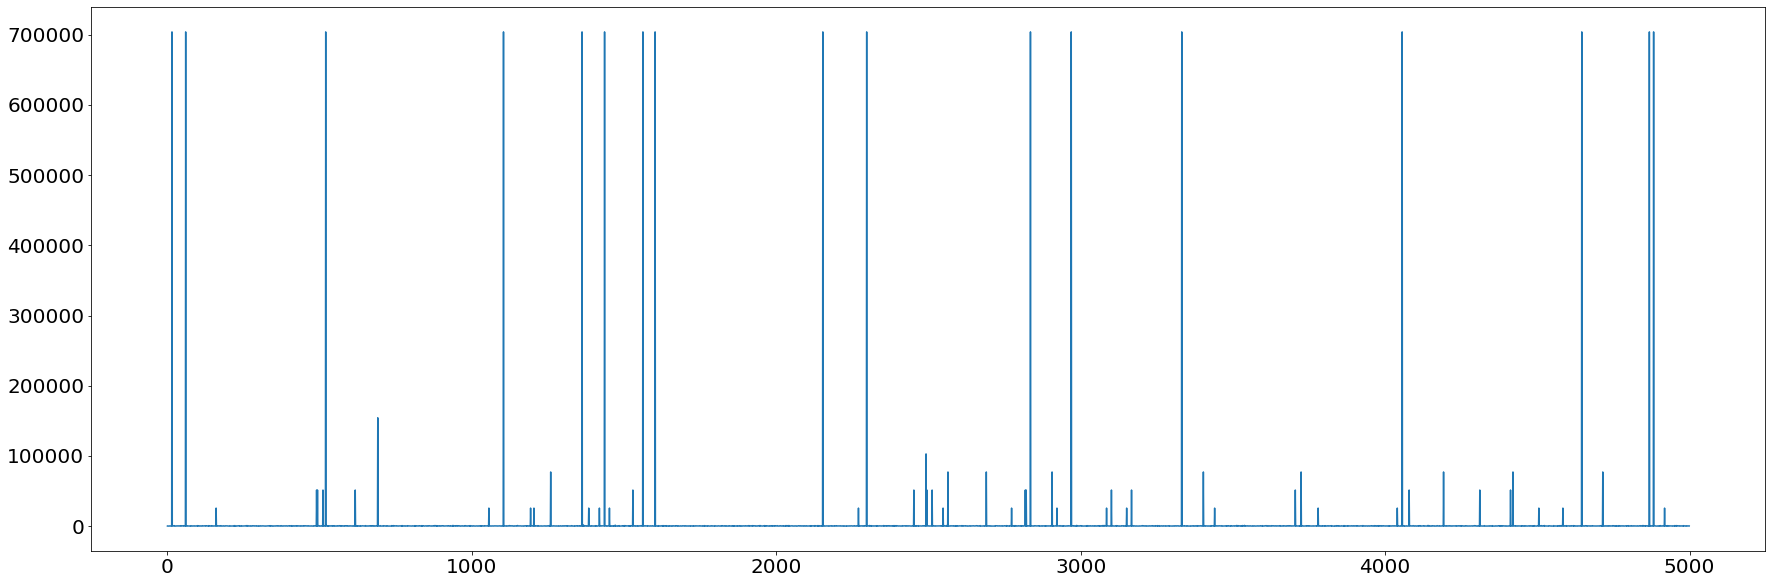

In [60]:
#visualization of the order_amount data
order=data['order_amount']
order.plot(figsize=(30,10), fontsize=20)

In [61]:
#it seems there are many outliers in order amount data.

In [62]:
#visualization of the order_amount showed that there are multiple outliers in this column.

<AxesSubplot:>

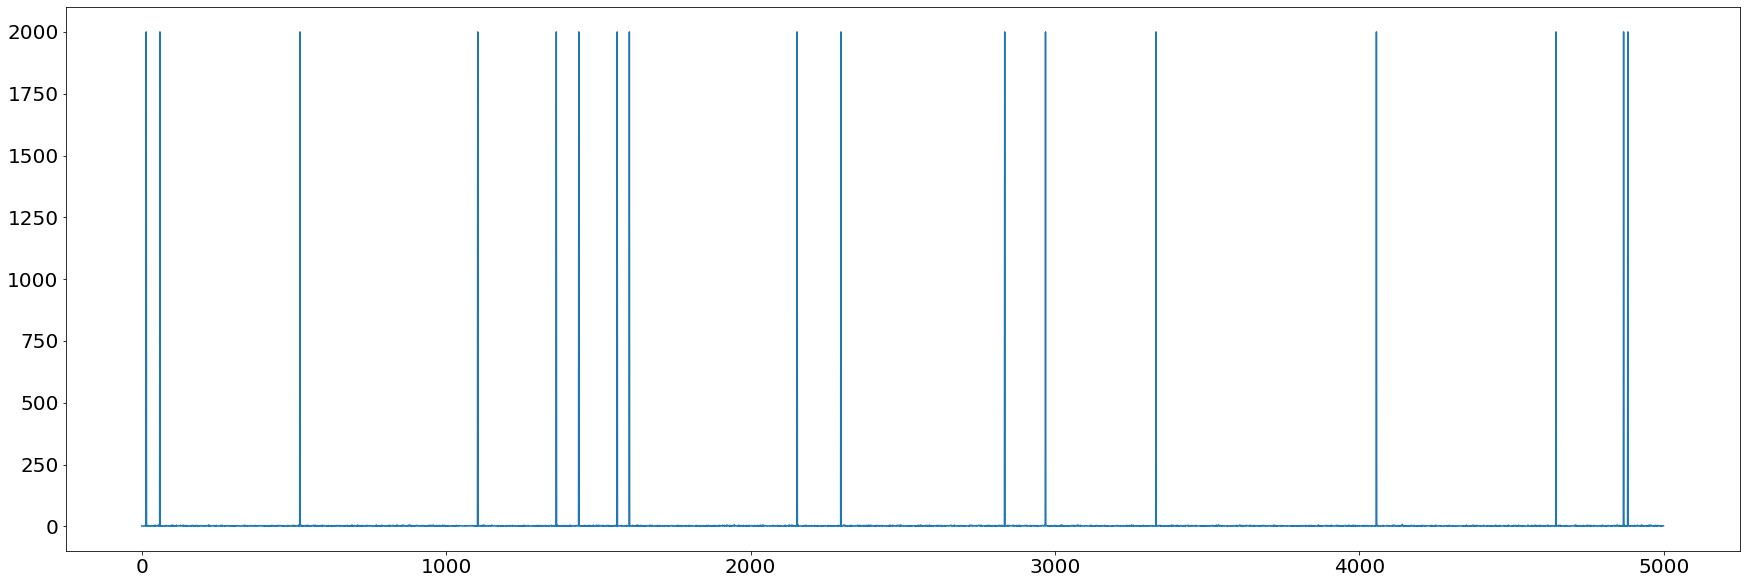

In [63]:
#visualization of the total items data
total=df['total_items']
total.plot(figsize=(30,10),fontsize=20)

In [64]:
#it also seems there are outliers in total items data, 
#however there are less outliers compare to total items data.

In [65]:
#Sorting the data would be a simple but effective way to highlight unusual values.
#In order to detect outliers, sorted data by order amount and then grouped by total items.

In [66]:
data.sort_values(by=['order_amount'], ascending=False).groupby('total_items').head()

,order_id,shop_id,user_id,order_amount,total_items
2153,2154,42,607,704000,2000
3332,3333,42,607,704000,2000
520,521,42,607,704000,2000
1602,1603,42,607,704000,2000
60,61,42,607,704000,2000
691,692,78,878,154350,6
2492,2493,78,834,102900,4
3724,3725,78,766,77175,3
4420,4421,78,969,77175,3
4192,4193,78,787,77175,3


In [67]:
#it can be seen that order_amount column has some outlier data, also corresponding data in total_item rows is not meaninful
#On the other hand, if we look at the shop_id column, we can see that unusual data entries made by the same shops (with id = 78, 42) 
#Some of the entries done by "shop 42" are too big (order:704.000, item:2000) 
# and shop 78 entered unusual entries (order/item : (25725/1),(154350:6), etc..)
#I would report these unusual entries and the shops responsible for them.
#We can exlclude this outliers from the data, analyze the remaining data.
#Therefore I decided remove these outlier data

In [68]:
cleandata = data[data.order_amount<25725]

In [69]:
# here is the number of rows for "data" and "cleandata"
print(cleandata.shape)
print(data.shape) 
print (1-cleandata.shape[0]/data.shape[0])


(4937, 5)
(5000, 5)
0.012599999999999945


In [70]:
#As you can see, percentage(% 1.2) of outliers in overall data is very small, statistically negligible.

In [72]:
cleandata.describe() #here, another checking to see if there is a missing unusual statistic. 

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


In [73]:
#As you can see above, It looks like there is no anomaly in general tatistics of cleandata.
#Also it can been seen that values in the the order_amount column and corresponding values in the total_items column are reasonable.
#There is statistically enough data to calculate average order value (AOV).
#Therefore I calculated average value of order.

In [74]:
AOW=cleandata['order_amount'].mean()
print (f" The average order value (AOV) is: ${AOW}")

 The average order value (AOV) is: $302.58051448247926


In [75]:
#On the other hand, Z-score function could be employed as a supporting analysis
#Below, I used Z-score function defined in scipy library to detect the outliers.
#Threshold is 3, to identify outliers.
#Detected the outliers using Z-score and remove the outliers from the data.

In [76]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
threshold = 3
data2 = data[(z < 3).all(axis=1)]
data2.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000
mean,2501.423525,50.100763,849.912686,723.261742,1.993175
std,1443.007416,29.051946,86.808108,4848.500488,0.981639
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1251.250000,24.000000,776.000000,163.000000,1.000000
50%,2502.500000,50.000000,850.000000,284.000000,2.000000
75%,3750.750000,75.000000,925.000000,390.000000,3.000000
max,5000.000000,100.000000,999.000000,102900.000000,8.000000


In [77]:
#AOV seems still high value (723.26) for order_amount 
#and the maximum vaule of order_amount is 102900,still a high value for this column.
#Therefore I applied Z-score process one more time.

In [78]:
import numpy as np
z = np.abs(stats.zscore(data2))
threshold = 3
data3 = data2[(z < 3).all(axis=1)]
data3.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4851.000000,4851.000000,4851.000000,4851.000000,4851.000000
mean,2499.900639,49.863121,849.951350,294.206555,1.939188
std,1443.441681,29.079532,86.889854,147.721251,0.895931
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1249.500000,24.000000,776.000000,162.000000,1.000000
50%,2499.000000,50.000000,850.000000,280.000000,2.000000
75%,3752.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,1408.000000,4.000000


In [325]:
#Now overall statistics table seems more reasonable
AOW2=data3['order_amount'].mean()
AOW2 # average order value (AOV)

294.2065553494125

In [79]:
#After Z-Score process, AOW value seeems reasonable to have an initial insight about average order value (AOV). 
#However, Previeous AOV value should be taken into account and considered as an answer. 